## ANUVIND MP
## AM.EN.U4AIE22010

In [ ]:
pip install opencv-python opencv-contrib-python matplotlib


1. Implement Harris algorithm to detect corners in the first image (Lab
4_1.jpg) and visualize the results.


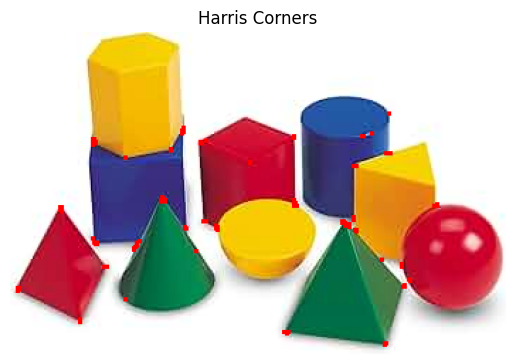

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('/content/Lab 4_1.jpg')

# Check if image loaded successfully
if img is None:
    raise FileNotFoundError("Image 'Lab4_1.jpg' not found. Make sure it is uploaded and the filename is correct.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Harris corner detection
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Show image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners')
plt.axis('off')
plt.show()


2. Implement SIFT algorithm and extract key feature points for the second
(Lab 4_2.jpg) and third image (Lab 4_3.jpg). Display the key points

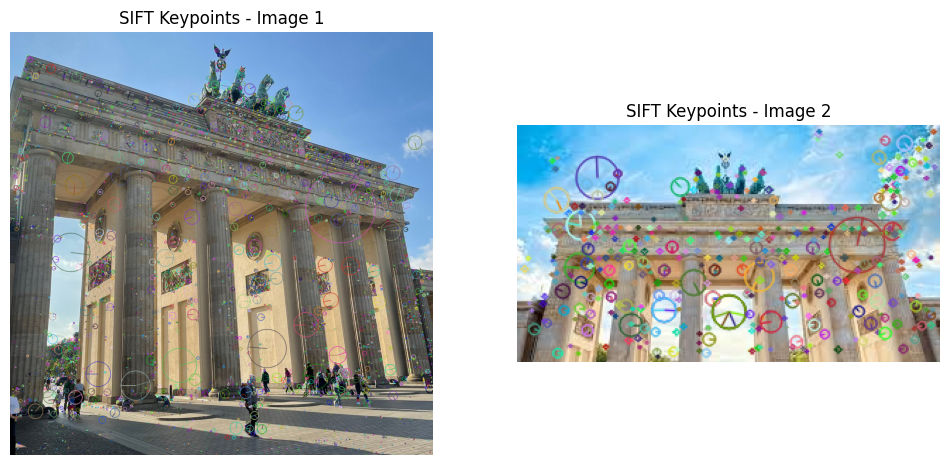

In [ ]:
# Load images
img1 = cv2.imread('/content/Lab 4_2.jpg')
img2 = cv2.imread('/content/Lab 4_3.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Draw keypoints
img1_kp = cv2.drawKeypoints(img1, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_kp = cv2.drawKeypoints(img2, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1_kp, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints - Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2_kp, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints - Image 2')
plt.axis('off')
plt.show()


3. Perform feature matching and display the matching pairs. Try using both
brute-force and KNN-based matching and compare results.

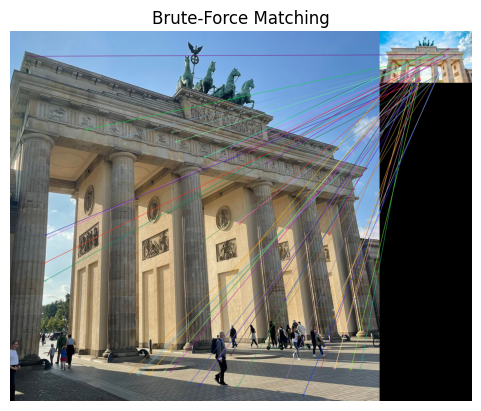

In [ ]:
# Brute-force matcher
bf = cv2.BFMatcher()
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 50 matches
img_matches_bf = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

plt.imshow(cv2.cvtColor(img_matches_bf, cv2.COLOR_BGR2RGB))
plt.title('Brute-Force Matching')
plt.axis('off')
plt.show()


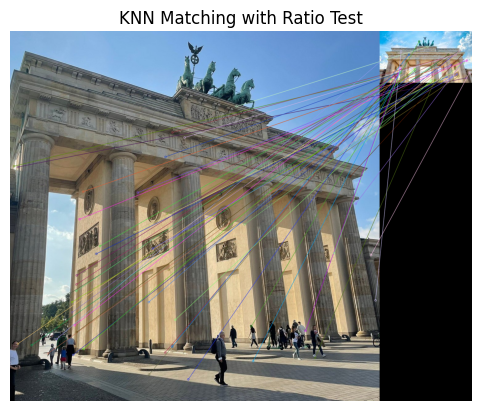

In [ ]:
# KNN matching
knn_matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good_matches = []
for m, n in knn_matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches_knn = cv2.drawMatches(img1, kp1, img2, kp2, good_matches[:50], None, flags=2)

plt.imshow(cv2.cvtColor(img_matches_knn, cv2.COLOR_BGR2RGB))
plt.title('KNN Matching with Ratio Test')
plt.axis('off')
plt.show()
